In [ ]:
import requests

def extract_cifar_data(url, filename="cifar.tar.gz"):
    r = requests.get(url)
    with open(filename, "wb") as file_context:
        file_context.write(r.content)
    return

In [ ]:
extract_cifar_data("https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz")

In [ ]:
import tarfile

with tarfile.open("cifar.tar.gz", "r:gz") as tar:
    tar.extractall()

In [3]:
import pickle

with open("./cifar-100-python/meta", "rb") as f:
    dataset_meta = pickle.load(f, encoding='bytes')

with open("./cifar-100-python/test", "rb") as f:
    dataset_test = pickle.load(f, encoding='bytes')

with open("./cifar-100-python/train", "rb") as f:
    dataset_train = pickle.load(f, encoding='bytes')

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset_train.keys()
import os

## DataFrame Creation part *(not affect the current problem)*

In [73]:
#Construct the dataframe
df_train = pd.DataFrame({
    "filenames": dataset_train[b'filenames'],
    "labels": dataset_train[b'fine_labels'],
    "row": range(len(dataset_train[b'filenames']))
})

In [74]:
df_train.head()

,filenames,labels,row
0,b'bos_taurus_s_000507.png',19,0
1,b'stegosaurus_s_000125.png',29,1
2,b'mcintosh_s_000643.png',0,2
3,b'altar_boy_s_001435.png',11,3
4,b'cichlid_s_000031.png',1,4


In [75]:
#creating a drop function for labels which are not 8 or 48
def unnesdrop(df):
    index_names = df[(df['labels'] !=8) & (df['labels'] !=48)].index
    df.drop(index_names, inplace = True)
    return
    

In [76]:
unnesdrop(df_train)

In [77]:
df_train.head()

,filenames,labels,row
16,b'bike_s_000682.png',8,16
30,b'bike_s_000127.png',8,30
130,b'cycle_s_002598.png',8,130
152,b'minibike_s_000824.png',48,152
195,b'motorcycle_s_001856.png',48,195


In [36]:
# Decode df_train.filenames so they are regular strings
df_train["filenames"] = df_train["filenames"].apply(
    lambda x: x.decode("utf-8")
)

In [38]:
df_test = pd.DataFrame({
    "filenames": dataset_test[b'filenames'],
    "labels": dataset_test[b'fine_labels'],
    "row": range(len(dataset_test[b'filenames']))
})

In [39]:
test_index_names = df_test[(df_test['labels'] != 8) & (df_test['labels'] != 48) ].index

In [40]:
# Drop all rows from df_test where label is not 8 or 48
df_test.drop(test_index_names, inplace = True)

In [41]:
# Decode df_test.filenames so they are regular strings
df_test["filenames"] = df_test["filenames"].apply(
    lambda x: x.decode("utf-8")
)

In [42]:
df_test.head()

,filenames,labels,row
27,safety_bike_s_000390.png,8,27
28,bike_s_000658.png,8,28
116,velocipede_s_001744.png,8,116
161,bike_s_000643.png,8,161
319,ordinary_bicycle_s_000437.png,8,319


## Problem Starts Here
**Reshaping the Image data and output each image with corresponding file names**

In [65]:
dataset_train_x = dataset_train[b'data']

In [94]:
import os.path
def save_images():
    #Grab the image data in row-major form
    row = dataset_train_x[i]
    red, green, blue = row[0:1024], row[1024:2048], row[2048:]

    # Each 32 items in the channel are a row in the 32x32 image
    red = red.reshape(32,32)
    green = green.reshape(32,32)
    blue = blue.reshape(32,32)

    # Combine the channels into a 32x32x3 image!
    img = np.dstack((red,green,blue))
    
    #target = dataset_meta[b'fine_label_names'][dataset_train[b'fine_labels'][i]]
    target = dataset_train[b'filenames'][i]
    # Save the image
    path = os.path.join("train/")
    #plt.imsave(path+target.decode()+".png", img)
    plt.imsave(path+target.decode(), img)
    return

In [95]:
for i in range(49999):
    save_images()

## for only one of each image

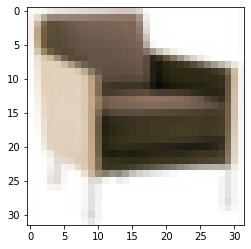

In [89]:
row = dataset_train_x[8685]
red, green, blue = row[0:1024], row[1024:2048], row[2048:]
    
red = red.reshape(32,32)
green = green.reshape(32,32)
blue = blue.reshape(32,32)
    
img = np.dstack((red,green,blue))
plt.imshow(img);

In [88]:
# image name 
n = 8685
print(dataset_meta[b'fine_label_names'][dataset_train[b'fine_labels'][n]])
#plt.imsave("cattle.png", img)

b'chair'
